In [1]:
# import Pkg
# Pkg.add("CSV")
# Pkg.add("Dates")
# Pkg.add("DataFrames")
# Pkg.add("DataFramesMeta")
# Pkg.add("JuMP")
# Pkg.add("Gurobi")
# Pkg.add("Distances")
# Pkg.add("Random")
# Pkg.add("Distributions")
# Pkg.add("Statistics")
# Pkg.add("Graphs")
# Pkg.add("GraphPlot")
# Pkg.add("MultiObjectiveAlgorithms")
# Pkg.add("Compose")
# Pkg.add("Cairo")
# Pkg.add("Colors")
# Pkg.add("ColorSchemes")
# Pkg.add("Fontconfig")
# Pkg.add("Leaflet")
# Pkg.add("GeoInterface")

In [2]:
using Plots
using Compose, Cairo, Fontconfig

In [35]:
include("./src/utils.jl")
include("./src/data.jl")
include("./src/opt.jl")
include("./src/out.jl")
include("./src/lagrange.jl")
include("./src/metrics.jl");

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-23


In [4]:
trips, shapes = loadGTFS("..\\data\\Nanaimo-GTFS");
# trips, shapes = loadGTFS("..\\data\\Cranbrook-GTFS");

In [38]:
# subset = subsetGTFS(trips, 9, randomSeed = 12) # good example
# subset = subsetGTFS(trips, 10, randomSeed = 12) # good example
# subset = subsetGTFS(trips, 20, randomSeed = 2); # good example for mapping
# subset = subsetGTFS(trips, 20; routes = [1, 2, 3, 5, 7, 14, 20], start_time = 8, stop_time = 12, randomSeed = 1)
subset = subsetGTFS(trips; n = 30, routes = [6, 7, 8, 15, 25, 30, 76], start_time = 8, stop_time = 12, randomSeed = 1)
instance = VSPInstance(subset);
del_model = VSPModel(instance; numScenarios = 100, split = 0.8, warmStart = false, isInt = true, multiObj = false)
# vsp_model_nonint = VSPModel(instance; isInt = false, multiObj = false)
mcf_model = MCFModel(instance)
del_solution = solve!(del_model);
# vsp_solution_nonint = solve!(vsp_model_nonint)
mcf_solution = solve!(mcf_model);

numTrips = 30
numVehicles = 9.0
isInt = true
termination_status(mod.model) = MathOptInterface.OPTIMAL
objective_value(mod.model) = 948.719317977545
solve_time(mod.model) = 4.312999963760376


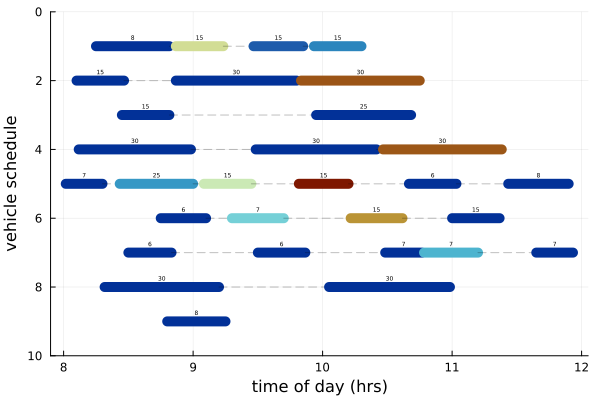

In [39]:
plotVSP_time(mcf_solution; delays = del_model.L_test)

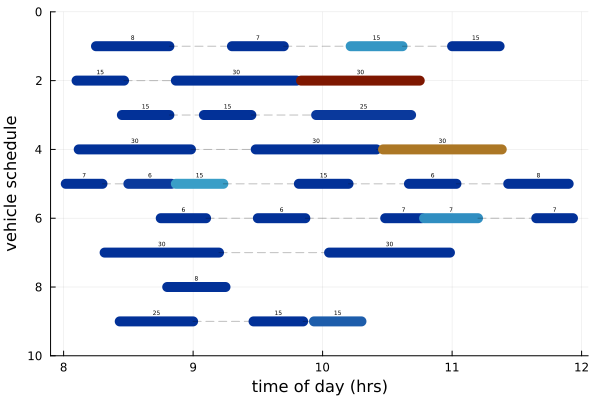

In [40]:
plotVSP_time(del_solution; delays = del_model.L_train)

In [41]:
del_stats = getSolutionStats(del_solution, shapes, del_model.L_test).metrics
mcf_stats = getSolutionStats(mcf_solution, shapes, del_model.L_test).metrics;

In [42]:
describe(mcf_stats[:, Not("geometry")])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,duration,2.58333,0.45,2.65,3.88333,0,Float64
2,num_trips,3.33333,1,3.0,6,0,Int64
3,utilization,0.706617,0.490291,0.68125,1.0,0,Float64
4,propagated_delay,0.119327,0.0,0.15887,0.327566,0,Float64
5,propagated_delay_err,0.0596881,0.0,0.0754274,0.131113,0,Float64
6,trip_distance,3.86693e6,883538.0,3.41643e6,8.06807e6,0,Float64


In [43]:
describe(del_stats[:, Not("geometry")])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,duration,2.59074,0.45,2.66667,3.88333,0,Float64
2,num_trips,3.33333,1,3.0,6,0,Int64
3,utilization,0.707571,0.534031,0.68125,1.0,0,Float64
4,propagated_delay,0.0598871,0.0,0.0560426,0.164155,0,Float64
5,propagated_delay_err,0.0351608,0.0,0.0273267,0.0939486,0,Float64
6,trip_distance,3.86693e6,883538.0,3.13782e6,8.06807e6,0,Float64


In [6]:
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-instance.png", 16cm, 16cm), plotVSP(instance))
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-mcf_solution.png", 16cm, 16cm), plotVSP(mcf_solution))
# draw(PNG(".\\imgs\\VSP-PD-$(instance.n-1)-mcf_solution.png", 16cm, 16cm), plotVSP(vsp_solution_nonint))

## Leaflet

In [44]:
m = plotVSP_map(del_stats; schedule = nothing)

Leaflet.Map{Vector{Leaflet.Layer}, Leaflet.Config{Leaflet.Provider}, WebIO.Scope}(Leaflet.Layer[Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.85056, 49.09598], [-123.85049, 49.09552], [-123.84811, 49.09549], [-123.84763, 49.0956], [-123.84706, 49.09586], [-123.84811, 49.09691], [-123.85013, 49.09802], [-123.85045, 49.09807], [-123.85059, 49.09826], [-123.85158, 49.09897]  …  [-123.9575, 49.15898], [-123.95898, 49.15899], [-123.96064, 49.15915], [-123.96105, 49.159], [-123.9626, 49.15901], [-123.96419, 49.15902], [-123.96679, 49.15904], [-123.96724, 49.15877], [-123.96724, 49.15846], [-123.96678, 49.1579]], nothing, nothing), Dict{Symbol, Any}(:color => "#1F77B4", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.96678, 49.1579], [-123.92851, 49.11288]], nothing, nothing), Dict{Symbol, Any}(:color => "gray", :border_width => 2, :opacity => 0.5, :color_map => "nothing", :fill_opacity => 0.5, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.92851, 49.11288], [-123.93055, 49.1111], [-123.93086, 49.11089], [-123.93112, 49.11077], [-123.93219, 49.11054], [-123.932, 49.11009], [-123.9321, 49.1092], [-123.93201, 49.10905], [-123.93211, 49.10755], [-123.93209, 49.10565]  …  [-123.93279, 49.15991], [-123.9328, 49.16159], [-123.93289, 49.16192], [-123.9317, 49.16195], [-123.93259, 49.16298], [-123.93291, 49.16314], [-123.93208, 49.1639], [-123.93136, 49.16462], [-123.93113, 49.16442], [-123.93151, 49.16426]], nothing, nothing), Dict{Symbol, Any}(:color => "#1F77B4", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.92851, 49.11288], [-124.05263, 49.23638]], nothing, nothing), Dict{Symbol, Any}(:color => "gray", :border_width => 2, :opacity => 0.5, :color_map => "nothing", :fill_opacity => 0.5, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-124.05263, 49.23638], [-124.04988, 49.23471], [-124.04956, 49.23471], [-124.04921, 49.23494], [-124.04836, 49.235], [-124.04838, 49.23332], [-124.04844, 49.23298], [-124.04822, 49.23262], [-124.04804, 49.23245], [-124.04772, 49.23227]  …  [-123.96124, 49.16168], [-123.96111, 49.16135], [-123.96113, 49.16003], [-123.96115, 49.159], [-123.9626, 49.15901], [-123.96419, 49.15902], [-123.96679, 49.15904], [-123.96724, 49.15877], [-123.96724, 49.15846], [-123.96678, 49.1579]], nothing, nothing), Dict{Symbol, Any}(:color => "#1F77B4", :border_width => 2, :opacity => 1, :color_map => "nothing", :fill_opacity => 1, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}([[-123.93151, 49.16426], [-123.96678, 49.1579]], nothing, nothing), Dict{Symbol, Any}(:color => "gray", :border_width => 2, :opacity => 0.5, :color_map => "nothing", :fill_opacity => 0.5, :marker_size => 3.0)), Leaflet.Layer{GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothing, Nothing}}(GeoInterface.Wrappers.LineString{false, false, Vector{Vector{Float64}}, Nothi

## Bender's decomposition

In [9]:
# fs = FirstStageProblem(instance; timeLimit = 10)
# add_benders_callback!(fs)
# bd_solution = solve!(fs);
# @show mean(lp_callback_runtimes)
# @show mean(get_p_callback_runtimes);
# MOI.get(fs.model, MOI.RelativeGap())
# plotVSP(bd_solution)

## 10 sec Opt Gap

In [11]:
# instance_sizes = 100:100:500
# opt_gap_IP = []
# opt_gap_BD = []

# for size in instance_sizes
#     sum_IP = 0
#     sum_BD = 0
#     for i in 1:5
#         subset = subsetGTFS(trips, size, randomSeed = i)
#         instance = VSPInstance(subset)
#         model_IP = VSPModel(instance, isInt = true, multiObj = false, timeLimit = 10)
#         model_BD = FirstStageProblem(instance, timeLimit = 10)
#         add_benders_callback!(model_BD)
#         sol_IP = solve!(model_IP);
#         sol_BD = solve!(model_BD);
#         sum_IP += MOI.get(model_IP.model, MOI.RelativeGap())
#         sum_BD += MOI.get(model_BD.model, MOI.RelativeGap())
#     end
#     push!(opt_gap_IP, sum_IP / 5)
#     push!(opt_gap_BD, sum_BD / 5)
# end
@show [opt_gap_IP opt_gap_BD]

[opt_gap_IP opt_gap_BD] = [6.031947682607448e-6 0.1629275916113045; 0.027256919099971622 0.47132052625010956; 0.526180825699331 0.768839649480148; 0.7067324202226736 0.8463141117589137]


4×2 Matrix{Float64}:
 6.03195e-6  0.162928
 0.0272569   0.471321
 0.526181    0.76884
 0.706732    0.846314

## Lagrange relaxation

In [51]:
LR = LagrangeRelaxation(instance)

for i ∈ 1:100
    status = update!(LR)
    if status
        println(i)
        break
    end
end

Solution found within 1% optimality gap.
3


In [60]:
# plot([LR.UB LR.LB])
# hline!([objectiveValue(vsp_solution.x, vsp_solution.s, instance.C, instance.M)])
# plot(LR.opt_gap, ylims = [0, 1])
# LR.λ
# println(
#     "vsp: ",
#     sum(LR.x[LR.best_idx[1]] .+ vsp_solution.x .> 1) / sum(vsp_solution.x),
#     "; mcf: ",
#     sum(LR.x[LR.best_idx[1]] .+ mcf_solution.x .> 1) / sum(mcf_solution.x)
# )
# (minimum(LR.UB) .- objective_value(vsp_model.model)) ./ objective_value(vsp_model.model)
# (LR.UB[1] .- objective_value(vsp_model.model)) ./ objective_value(vsp_model.model)
# LR.s_adj
# plotVSP(instance, LR.x[LR.best_idx[1]], LR.s_adj[LR.best_idx[1]])

## solve times

In [8]:
# solve times
# instance_sizes = 20:20:200
# sol_times_LP = []
# sol_times_IP = []
# sol_times_BD = []

# for size in instance_sizes
#     sum_LP = 0
#     sum_IP = 0
    # sum_BD = 0
    # for i in 1:5
    #     subset = subsetGTFS(trips, size, randomSeed = i)
    #     instance = VSPInstance(subset)
    #     model_LP = VSPModel(instance, isInt = false, multiObj = false)
    #     model_IP = VSPModel(instance, isInt = true, multiObj = false)
        # model_BD = FirstStageProblem(instance)
        # add_benders_callback!(model_BD)
        # sol_LP = solve!(model_LP);
        # sol_IP = solve!(model_IP);
        # sol_BD = solve!(model_BD);
        # sum_LP += sol_LP.solve_time
        # sum_IP += sol_IP.solve_time
        # sum_BD += sol_BD.solve_time
    # end
    # push!(sol_times_LP, sum_LP / 5)
    # push!(sol_times_IP, sum_IP / 5)
    # push!(sol_times_BD, sum_BD / 5)
# end
# plot(
#     instance_sizes,
#     [sol_times_LP sol_times_IP];
#     xlabel = "number of trips",
#     ylabel = "solve time",
#     title = "LP, and IP solution times",
#     label = ["LP" "IP"]
# )
# png(".\\imgs\\VSP-PD-solve_times-BD")

## Pareto frontier

In [29]:
# Pareto frontier
# mod = vsp_model.model
# used_vehicles = [round(sum(value.(vsp_model.x[1, :]; result = i)); digits = 3) for i in 1:result_count(mod)]
# ideal_point = objective_bound(mod)
# pareto_plot = hline([ideal_point[2]]; color = :red, lw = 2, label = "", ylims = [1300, 1600], xlims = [-0.2, 7])
# vline!([ideal_point[1]]; color = :red, lw = 2, label = "objective bounds")
# Plots.scatter!(
#     [objective_value(mod; result = i)[1] for i in 1:result_count(mod)],
#     [objective_value(mod; result = i)[2] for i in 1:result_count(mod)];
#     xlabel = "delay",
#     ylabel = "cost",
#     title = "# trips: $(instance.n-1)",
#     label = "fleet used",
# )
# for i in 1:result_count(mod)
#     y = objective_value(mod; result = i)
#     Plots.annotate!(y[1], y[2] + 10, (used_vehicles[i], 10))
# end
# png(".\\imgs\\VSP-PD-$(instance.n-1)-pareto")
# pareto_plot